#**Question-1**

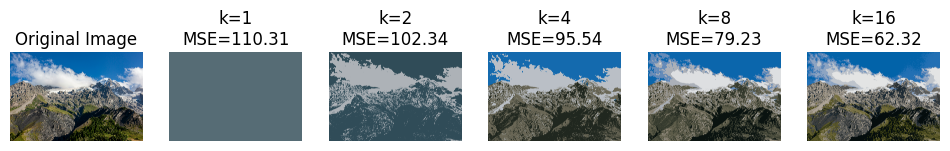

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


def kmeans_quantization(image, k):
    """
    Applies k-Means clustering to quantize the image.
    """
    h, w, c = image.shape
    pixels = image.reshape(-1, 3)  # Reshape to (num_pixels, 3)

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pixels)

    quantized_pixels = kmeans.cluster_centers_[kmeans.labels_]
    quantized_image = quantized_pixels.reshape(h, w, c).astype(np.uint8)

    return quantized_image

def mse(original, quantized):
    """
    Computes Mean Squared Error between the original and quantized images.
    """
    return np.mean((original - quantized) ** 2)

def main():
    image_path = "/content/Imagequestionone.jpg"
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    k_values = [1, 2, 4, 8, 16]

    plt.figure(figsize=(12, 8))
    plt.subplot(2, len(k_values) + 1, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    for i, k in enumerate(k_values):
        quantized_img = kmeans_quantization(image, k)
        error = mse(image, quantized_img)

        plt.subplot(2, len(k_values) + 1, i + 2)
        plt.imshow(quantized_img)
        plt.title(f"k={k}\nMSE={error:.2f}")
        plt.axis("off")

    plt.show()

if __name__ == "__main__":
    main()

#**Question-2**

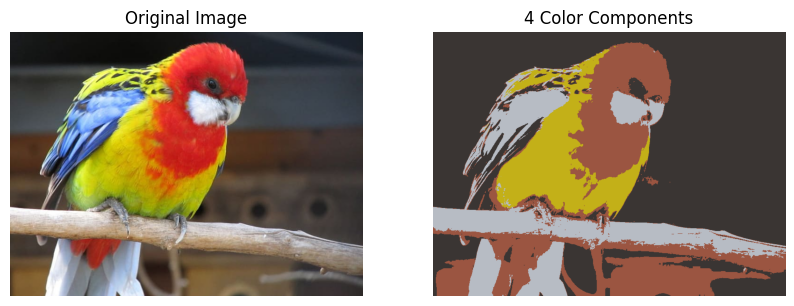

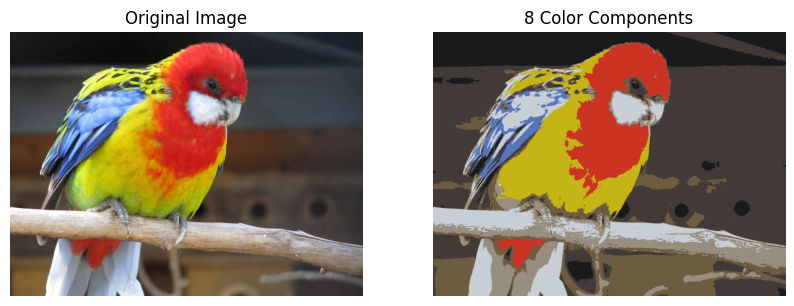

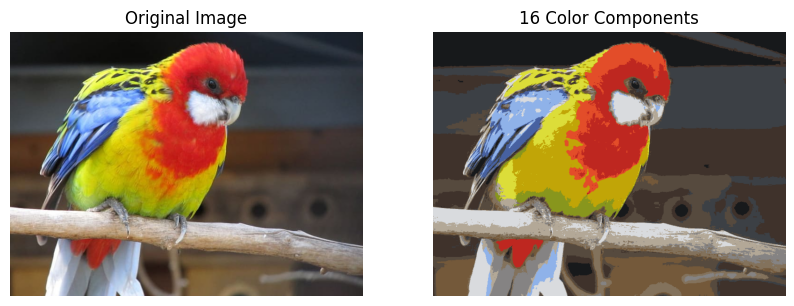

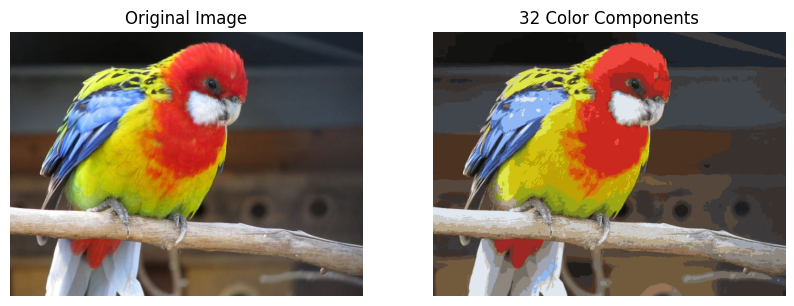

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_color_components(image_path, num_colors):
    image = cv2.imread("/content/imagequestiontwo.jpg")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    pixels = image.reshape((-1, 3))

    kmeans = cv2.kmeans(np.float32(pixels), num_colors, None,
                        (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0),
                        10, cv2.KMEANS_RANDOM_CENTERS)

    _, labels, centers = kmeans
    centers = np.uint8(centers)

    # Reconstruct segmented image
    segmented_image = centers[labels.flatten()].reshape(image.shape)

    # Display original and segmented images
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image)
    ax[0].set_title("Original Image")
    ax[0].axis("off")

    ax[1].imshow(segmented_image)
    ax[1].set_title(f"{num_colors} Color Components")
    ax[1].axis("off")

    plt.show()

# Example usage
image_path = "/content/imagequestiontwo.jpg"
extract_color_components(image_path, num_colors=4)
extract_color_components(image_path, num_colors=8)
extract_color_components(image_path, num_colors=16)
extract_color_components(image_path, num_colors=32)

#**Question 3**

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr

# Load the original 512x512 Lena grayscale image
image_path = "/content/lena_gray_512.tif"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Downsample the image to 256x256
reduced_image = cv2.resize(original_image, (256, 256), interpolation=cv2.INTER_AREA)

# Save the downsampled image
reduced_image_path = "/content/reduce_lena_256.tif"
cv2.imwrite(reduced_image_path, reduced_image)

# Output the path of the reduced image
reduced_image_path

'/content/reduce_lena_256.tif'

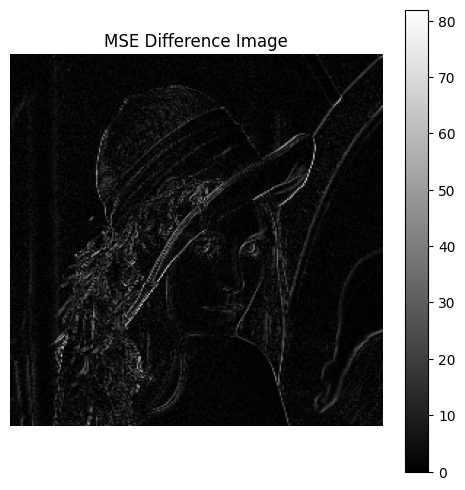

31.058421717719376

In [41]:
# Load the reference 256x256 Lena grayscale image
reference_image_path = "/content/lena_gray_256.tif"
reference_image = cv2.imread(reference_image_path, cv2.IMREAD_GRAYSCALE)

# Compute PSNR
psnr_value = psnr(reference_image, reduced_image)

# Compute Mean Squared Error (MSE) difference image
mse_difference = np.abs(reference_image.astype(np.float32) - reduced_image.astype(np.float32))

# Plot the MSE difference image
plt.figure(figsize=(6,6))
plt.imshow(mse_difference, cmap='gray')
plt.colorbar()
plt.title("MSE Difference Image")
plt.axis('off')
plt.show()

# Output the PSNR value
psnr_value


In [42]:
# Upsample using different interpolation methods
nearest_neighbor = cv2.resize(reduced_image, (512, 512), interpolation=cv2.INTER_NEAREST)
bilinear = cv2.resize(reduced_image, (512, 512), interpolation=cv2.INTER_LINEAR)
bicubic = cv2.resize(reduced_image, (512, 512), interpolation=cv2.INTER_CUBIC)

# Save the upsampled images
nearest_neighbor_path = "/content/upsampled_nearest.tif"
bilinear_path = "/content/upsampled_bilinear.tif"
bicubic_path = "/content/upsampled_bicubic.tif"

cv2.imwrite(nearest_neighbor_path, nearest_neighbor)
cv2.imwrite(bilinear_path, bilinear)
cv2.imwrite(bicubic_path, bicubic)

# Output the file paths
nearest_neighbor_path, bilinear_path, bicubic_path


('/content/upsampled_nearest.tif',
 '/content/upsampled_bilinear.tif',
 '/content/upsampled_bicubic.tif')

#**Question 4**

#Here's a Python script to filter a noisy image using various denoising techniques. The steps involved are:

Steps Involved:

Load the Noisy Image – Read the noisy image from the database.

Convert to Grayscale – Convert the image to grayscale for easier processing (if needed).

Apply Filtering Techniques:
Gaussian Blur – Reduces high-frequency noise while preserving edges.

Median Filter – Good for removing salt-and-pepper noise.

Bilateral Filter – Preserves edges while smoothing the image.

Non-Local Means Denoising – Advanced noise reduction for better clarity.

Compare the Results – Display the original and filtered images to compare the effectiveness of each method.

#Why These Filters?
Gaussian Blur: Uses a weighted average to reduce high-frequency noise but may blur edges.

Median Filter: Replaces each pixel with the median of its neighbors, effective against salt-and-pepper noise.

Bilateral Filter: Smooths while preserving edges by considering intensity differences.

Non-Local Means: A more advanced method that reduces noise without significant loss of detail.

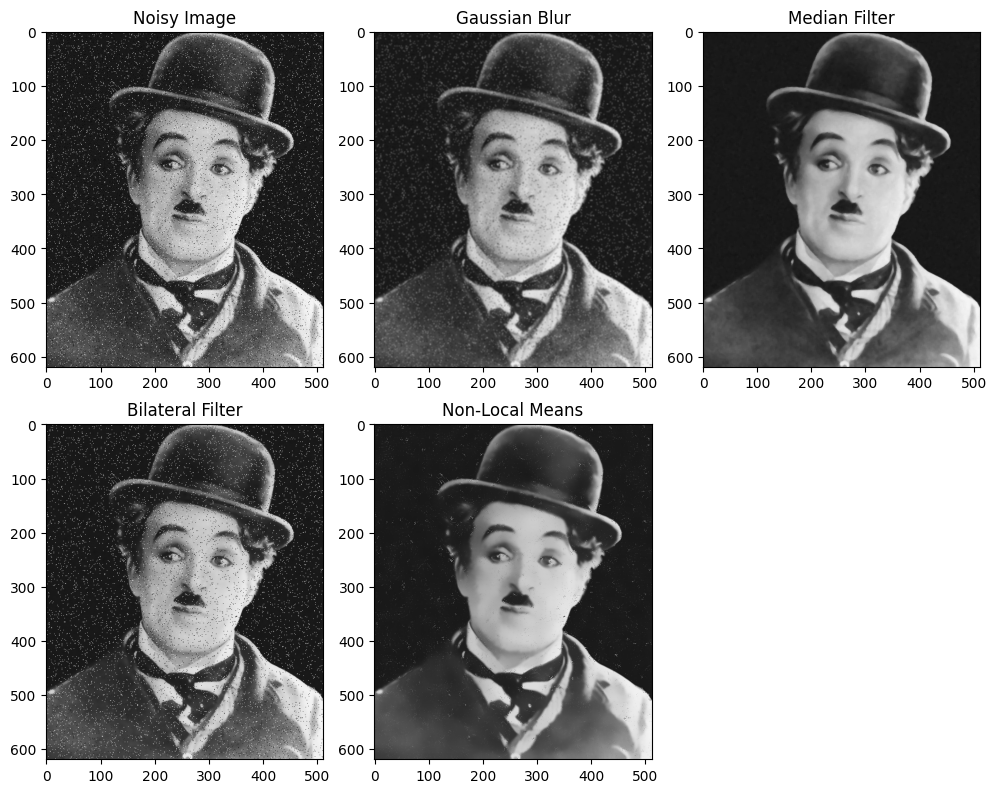

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the noisy image
noisy_image = cv2.imread('/content/noisyimageq4.png')

# Apply different filters
gaussian_blur = cv2.GaussianBlur(noisy_image, (5, 5), 0)
median_blur = cv2.medianBlur(noisy_image, 5)
bilateral_filter = cv2.bilateralFilter(noisy_image, 9, 75, 75)
non_local_means = cv2.fastNlMeansDenoising(noisy_image, None, 30, 7, 21)

# Display the results
plt.figure(figsize=(10, 8))

plt.subplot(231), plt.imshow(noisy_image), plt.title("Noisy Image")
plt.subplot(232), plt.imshow(gaussian_blur), plt.title("Gaussian Blur")
plt.subplot(233), plt.imshow(median_blur), plt.title("Median Filter")
plt.subplot(234), plt.imshow(bilateral_filter), plt.title("Bilateral Filter")
plt.subplot(235), plt.imshow(non_local_means), plt.title("Non-Local Means")

plt.tight_layout()
plt.show()


#**Question 5**

In [25]:
# Load the new image in grayscale
image_path = "/content/imageq5.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Compute first-order derivatives using Sobel operator
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Derivative along x
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Derivative along y

# Compute gradient magnitude
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
gradient_magnitude = np.uint8(255 * gradient_magnitude / np.max(gradient_magnitude))

# Apply thresholding to get edge map
_, edge_map = cv2.threshold(gradient_magnitude, 50, 255, cv2.THRESH_BINARY)

# Compute second-order derivative using Laplacian
laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian_edge_map = np.uint8(255 * np.abs(laplacian) / np.max(np.abs(laplacian)))

# Compute edge maps using LoG and Canny
log = cv2.GaussianBlur(image, (3,3), 0)
log = cv2.Laplacian(log, cv2.CV_64F)
log = np.uint8(255 * np.abs(log) / np.max(np.abs(log)))

canny_edges = cv2.Canny(image, 100, 200)


In [53]:
sobel_x


array([[  0.,  10., -14., ...,   6.,   0.,   0.],
       [  0.,  11.,  -8., ...,   6.,   1.,   0.],
       [  0.,  10.,   0., ...,   5.,   3.,   0.],
       ...,
       [  0.,  11.,   6., ...,  22.,  58.,   0.],
       [  0.,  -1.,  -1., ...,  50.,  84.,   0.],
       [  0.,  -6.,  -2., ...,  64.,  88.,   0.]])

In [30]:
sobel_y

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [-22., -21., -14., ...,   2.,   3.,   4.],
       [  4.,   2.,   2., ...,  -1.,  -1.,   0.],
       ...,
       [ 16.,   9.,  -4., ..., -68., -32., -10.],
       [  6.,   1.,  -5., ..., -58., -40., -36.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [31]:
gradient_magnitude

array([[ 0,  2,  3, ...,  1,  0,  0],
       [ 5,  5,  3, ...,  1,  0,  0],
       [ 0,  2,  0, ...,  1,  0,  0],
       ...,
       [ 3,  3,  1, ..., 17, 16,  2],
       [ 1,  0,  1, ..., 18, 22,  8],
       [ 0,  1,  0, ..., 15, 21,  0]], dtype=uint8)

In [32]:
_, edge_map

(50.0,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

In [33]:
laplacian_edge_map

array([[ 4,  0,  7, ...,  0,  0,  0],
       [ 0,  1,  3, ...,  0,  1,  1],
       [ 2,  3,  0, ...,  0,  0,  0],
       ...,
       [ 1,  1,  1, ...,  3,  3,  4],
       [ 0,  0,  1, ..., 11,  0, 21],
       [ 1,  0,  0, ...,  2,  0,  9]], dtype=uint8)

In [34]:
log

array([[ 5,  2,  4, ...,  1,  0,  2],
       [ 4,  1,  1, ...,  1,  2,  4],
       [ 6,  2,  1, ...,  0,  4,  0],
       ...,
       [ 1,  1,  1, ...,  0,  1, 12],
       [ 1,  1,  1, ..., 16,  4, 12],
       [ 0,  1,  5, ..., 17,  4, 10]], dtype=uint8)

In [35]:
canny_edges

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

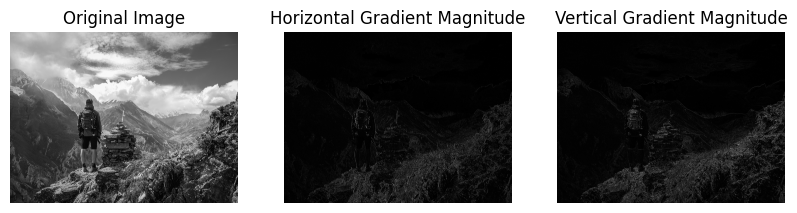

In [51]:
# Compute gradient magnitude using Sobel X and Y derivatives
gradient_magnitude_x = np.sqrt(sobel_x**2)
gradient_magnitude_y = np.sqrt(sobel_y**2)

# Plot the results with the original image, horizontal gradient magnitude, and vertical gradient magnitude
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# Show original image
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

# Show horizontal gradient magnitude
axes[1].imshow(gradient_magnitude_x, cmap='gray')
axes[1].set_title("Horizontal Gradient Magnitude")
axes[1].axis("off")

# Show vertical gradient magnitude
axes[2].imshow(gradient_magnitude_y, cmap='gray')
axes[2].set_title("Vertical Gradient Magnitude")
axes[2].axis("off")

# plt.tight_layout()
plt.show()




First-order derivatives:
(X-Derivative): Highlights vertical edges.
(Y-Derivative): Highlights horizontal edges.

Gradient magnitude:
Shows strong edge features based on intensity changes.

Thresholded edge map:
Extracted edges using a threshold on gradient magnitude.

Second-order derivative (Laplacian):
Captures edges using the Laplacian operator.

Canny edge detection:
Uses Gaussian smoothing, gradient computation, and non-maximum suppression for edge detection.